In [82]:
import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [83]:
# data wrangling
df = wrangle.wrangle_telco()

In [84]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1685 non-null   object 
 1   monthly_charges  1685 non-null   float64
 2   tenure           1685 non-null   int64  
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [89]:
# split the data in train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123)

In [90]:
#check the shape
train.shape, validate.shape, test.shape

((1011, 4), (337, 4), (337, 4))

In [91]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
1255,7493-GVFIO,20.55,57,1252.85
1060,6374-NTQLP,104.10,72,7447.70
1570,9258-CNWAC,113.65,71,8166.80
414,2511-ALLCS,24.30,35,821.60
639,3836-FZSDJ,24.85,71,1901.00


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results

In [92]:
# Define the thing
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the thing
scaler.fit(train[['monthly_charges']])

#transform
scaled = scaler.transform(train[['monthly_charges']])


# single step to fit and transform (use on train only)
scaled = scaler.fit_transform(train[['monthly_charges']])
scaled

array([[0.02142501],
       [0.85401096],
       [0.94917788],
       ...,
       [0.56203288],
       [0.86646736],
       [0.50572995]])

In [93]:
#you can make a new 'scaled' column in original dataframe if you wish
train['monthly_charges_scaled']  = scaled  

In [94]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled
1255,7493-GVFIO,20.55,57,1252.85,0.021425
1060,6374-NTQLP,104.10,72,7447.70,0.854011
1570,9258-CNWAC,113.65,71,8166.80,0.949178
414,2511-ALLCS,24.30,35,821.60,0.058794
639,3836-FZSDJ,24.85,71,1901.00,0.064275


Text(0, 0.5, 'Scaled Monthly Charges')

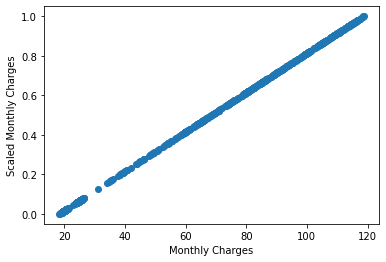

In [57]:
# plot total charges vs scaled total charges

plt.scatter(train.monthly_charges, scaled)
plt.xlabel('Monthly Charges')
plt.ylabel('Scaled Monthly Charges')

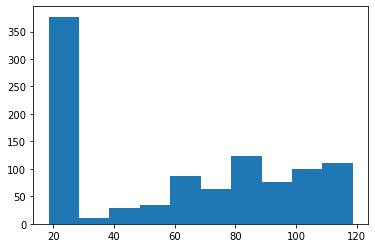

In [58]:
# plot distribution of monthly charges
plt.hist(train.monthly_charges);

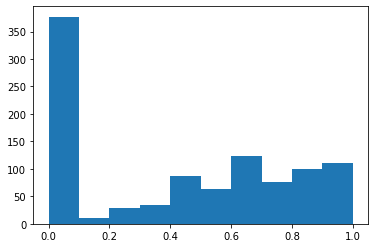

In [59]:
# plot distribution of monthly charges
plt.hist(scaled);

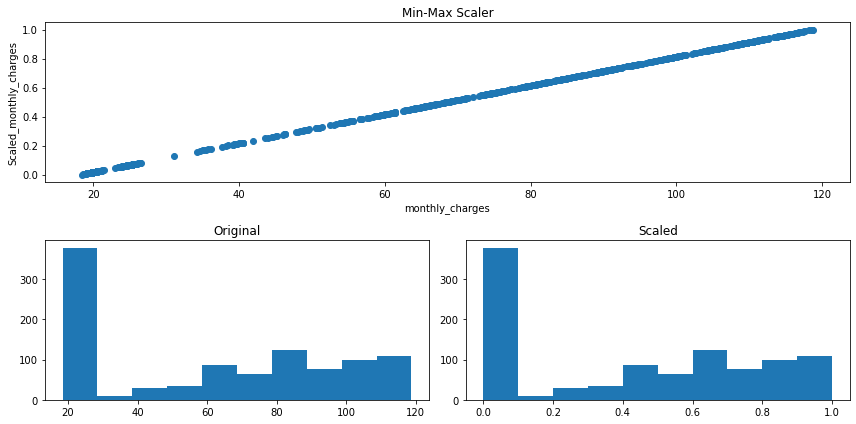

In [60]:
# plot all three charts above in a single figure
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'Scaled_monthly_charges', title = 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();

In [98]:
def visualize_scaled_data(scaler, scaler_name, train, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();


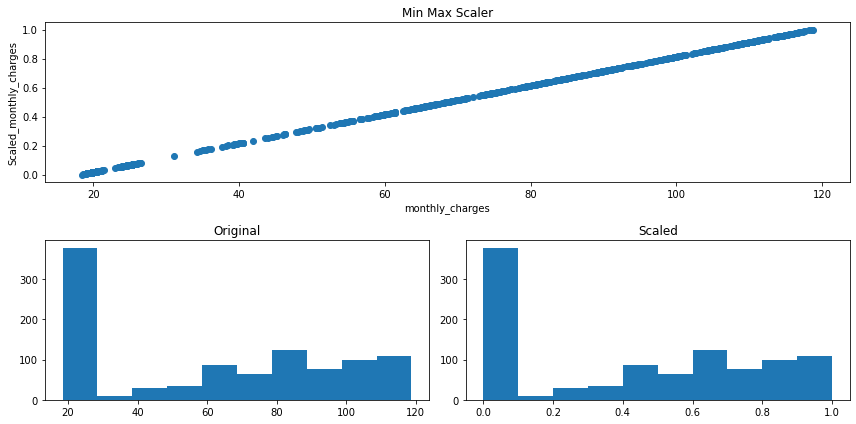

In [99]:
# use the function created above for monthly charges

visualize_scaled_data(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', train, 'monthly_charges')

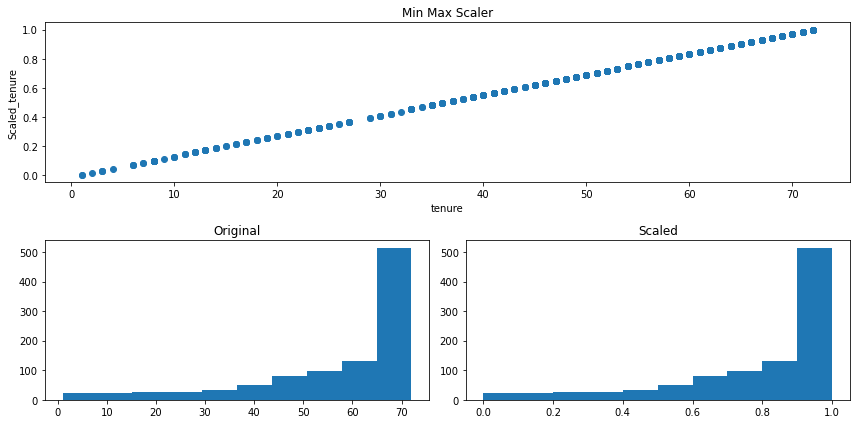

In [100]:
# visualize scaling for tenure

visualize_scaled_data(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler',train, 'tenure')

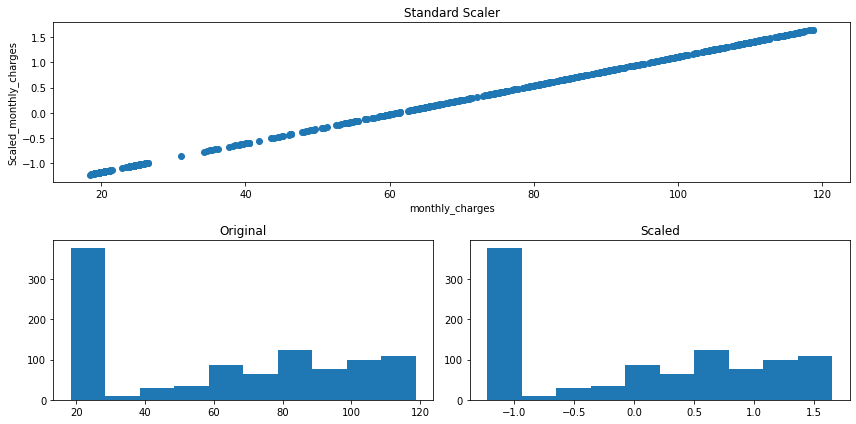

In [101]:
# visualize scaling for monthly charges

visualize_scaled_data(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'monthly_charges')

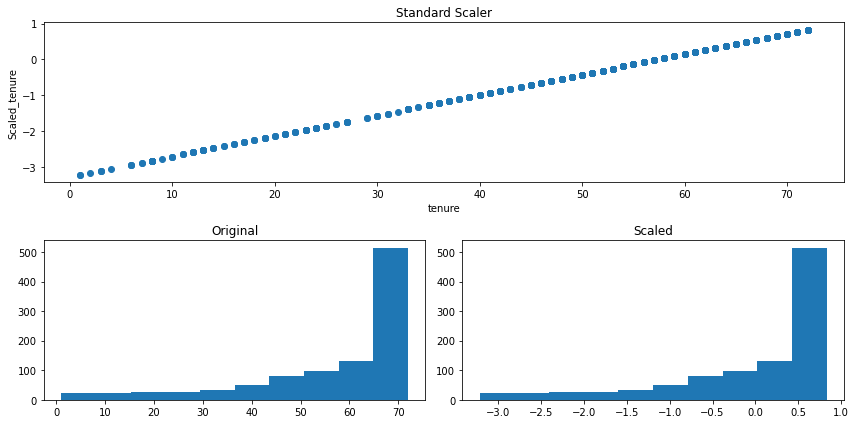

In [102]:
visualize_scaled_data(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'tenure')

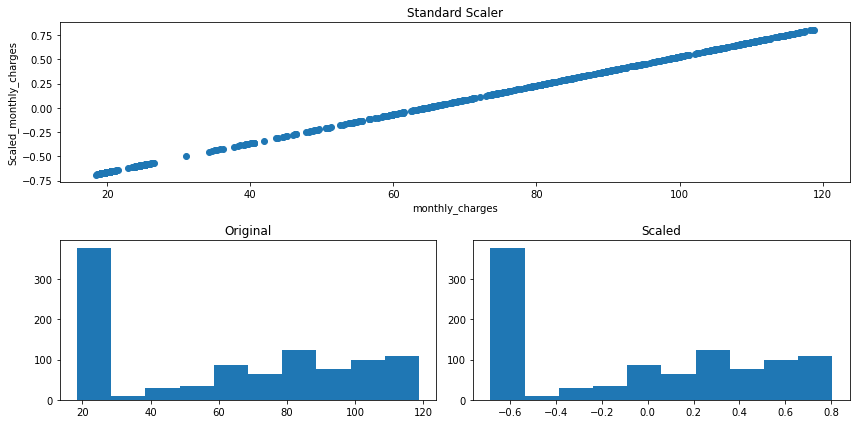

In [103]:
visualize_scaled_data(sklearn.preprocessing.RobustScaler(), 'Standard Scaler',train, 'monthly_charges')

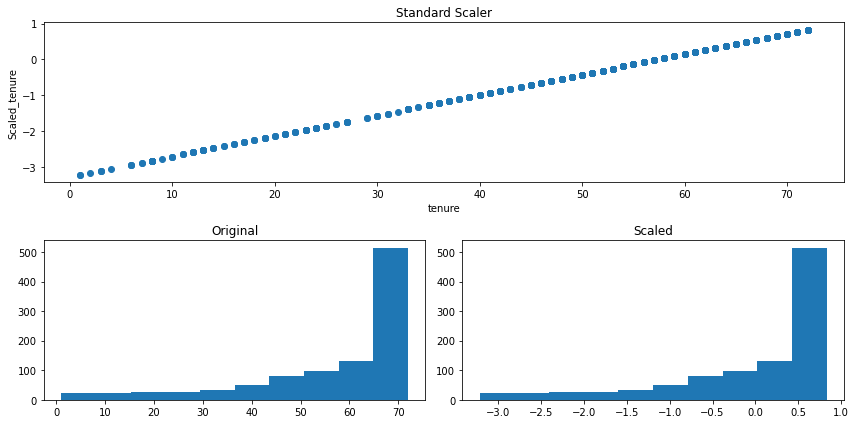

In [104]:
visualize_scaled_data(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'tenure')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [77]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled
1255,7493-GVFIO,20.55,57,1252.85,0.021425
1060,6374-NTQLP,104.10,72,7447.70,0.854011
1570,9258-CNWAC,113.65,71,8166.80,0.949178
414,2511-ALLCS,24.30,35,821.60,0.058794
639,3836-FZSDJ,24.85,71,1901.00,0.064275


In [78]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['monthly_charges', 'tenure']])
scaled

array([[0.02142501, 0.78873239],
       [0.85401096, 1.        ],
       [0.94917788, 0.98591549],
       ...,
       [0.56203288, 0.90140845],
       [0.86646736, 0.95774648],
       [0.50572995, 0.47887324]])

In [79]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['monthly_charges', 'tenure'])
scaled_df.head()

,monthly_charges,tenure
1255,0.021425,0.788732
1060,0.854011,1.000000
1570,0.949178,0.985915
414,0.058794,0.478873
639,0.064275,0.985915


In [80]:
# use inverse_transform method

scaler.inverse_transform(scaled_df)

array([[ 20.55,  57.  ],
       [104.1 ,  72.  ],
       [113.65,  71.  ],
       ...,
       [ 74.8 ,  65.  ],
       [105.35,  69.  ],
       [ 69.15,  35.  ]])

In [72]:
# we can change numpy 2d array to a dataframe

unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['monthly_charges', 'tenure'])
unscaled_df.head()

,monthly_charges,tenure
1255,20.55,57.0
1060,104.10,72.0
1570,113.65,71.0
414,24.30,35.0
639,24.85,71.0


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

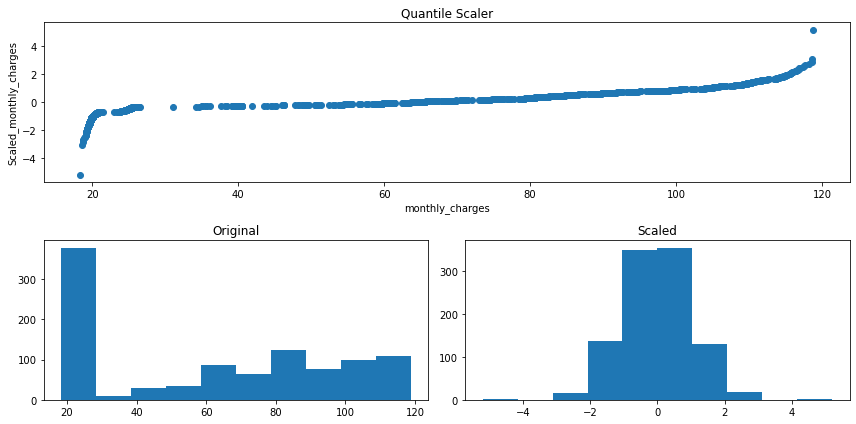

In [105]:
#visualize monthly charges quantile transformation with 'normal' output

visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'monthly_charges')

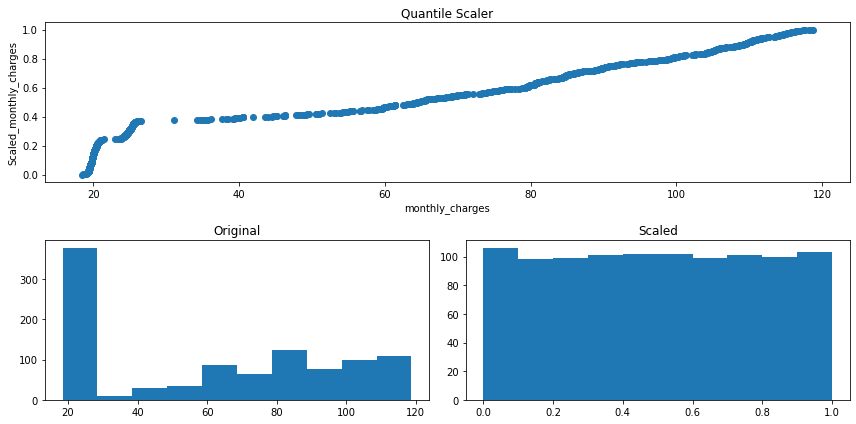

In [106]:
#visualize monthly charges quantile transformation with 'uniform' output

visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', train, 'monthly_charges')

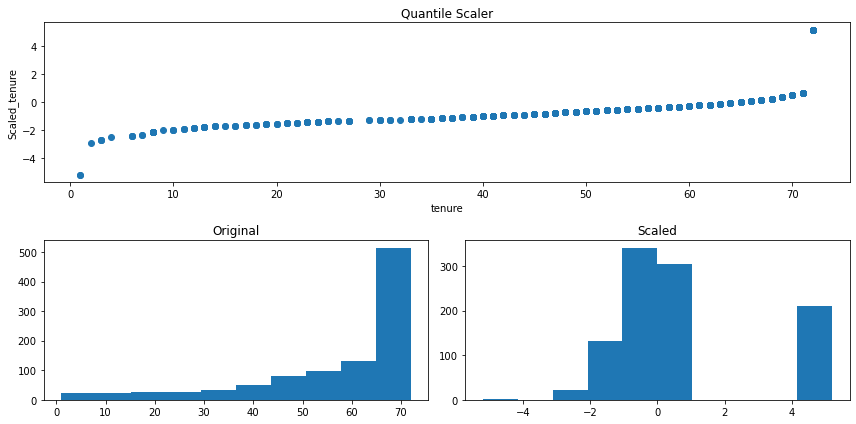

In [108]:
# for tenure

visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train,'tenure')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [30]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [31]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [32]:
X_train = train[['monthly_charges', 'tenure']]
X_validate = test[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

In [33]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,monthly_charges,tenure
1255,-1.164231,-0.024491
1060,1.230890,0.831297
1570,1.504659,0.774244
414,-1.056730,-1.279648
639,-1.040964,0.774244


### Scaling Takeaways:

1. Handle outliers first (unless you know that you want to use a non-linear (e.g. Quantile Transformer)) scaling


2. Min-Max Scaler will transform each value in the column proportionally within the desireable range (usually [0,1]). It will preserve the shape of the distribution (no distortion).


3. Standard Scaler will transform each value in the column to range about the mean 0 and standard deviation 1,  Use StandardScaler if you know the data distribution is normal.


4. If there are outliers (which you don't want to discard), use RobustScaler. Alternatively you could remove the outliers and use either of the above 2 scalers


5. Good practice to visualize the distribution of variables after scaling (make sure the transformation you were hoping for actually happened)


6. Use non-linear scalers when you really have to (e.g.Quantiler Transformer when you must have data normally distributed).

## Bonus: Effect of outliers on scaling 

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [34]:
# connection function for accessing mysql 
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = """
select * 
from properties_2017
join predictions_2017 using(parcelid)
where transactiondate between "2017-05-01" and "2017-06-30";
"""

df = pd.read_sql(query, get_connection('zillow'))
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,11393337,2463969,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,117,0.086137,2017-06-08
1,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
2,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30
3,14269464,1923117,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,2028,0.021085,2017-06-01
4,11389003,2121349,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,3273,-0.325393,2017-06-01


In [35]:
# Some prep
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "square_feet", "taxamount": "taxes", "taxvaluedollarcnt": "tax_value"})

In [36]:
features = [
    "parcelid",
    "bedrooms",
    "bathrooms",
    "square_feet",
    "tax_value"
]

df = df[features]
df = df.set_index("parcelid")
df.head()


,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
11393337,3.0,3.0,1534.0,43439.0
11289917,3.0,2.0,1458.0,136104.0
11705026,2.0,1.0,1421.0,35606.0
14269464,4.0,3.0,2541.0,880456.0
11389003,3.0,2.0,1650.0,614000.0


In [37]:
df.shape

(21943, 4)

In [38]:
# Let's drop the nulls
df = df.dropna()
df.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
11393337,3.0,3.0,1534.0,43439.0
11289917,3.0,2.0,1458.0,136104.0
11705026,2.0,1.0,1421.0,35606.0
14269464,4.0,3.0,2541.0,880456.0
11389003,3.0,2.0,1650.0,614000.0


In [39]:
# split the data in train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123)

In [40]:
#Train dataframe, but with outliers removed
train_no_outliers = train[train.tax_value <= 2_000_000]

### Min-Max Scaler

In [41]:
#scale values of 'tax_values' with outliers
scaler = sklearn.preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(train[['tax_value']])
scaled

array([[0.01059357],
       [0.04662492],
       [0.01925157],
       ...,
       [0.00150311],
       [0.04182688],
       [0.03711992]])

In [42]:
#scale values of 'tax_values' with outliers removed

scaler1 = sklearn.preprocessing.MinMaxScaler()
scaled1 = scaler.fit_transform(train_no_outliers[['tax_value']])
scaled1

array([[0.12723974],
       [0.56001372],
       [0.23123139],
       ...,
       [0.01805393],
       [0.50238429],
       [0.4458488 ]])

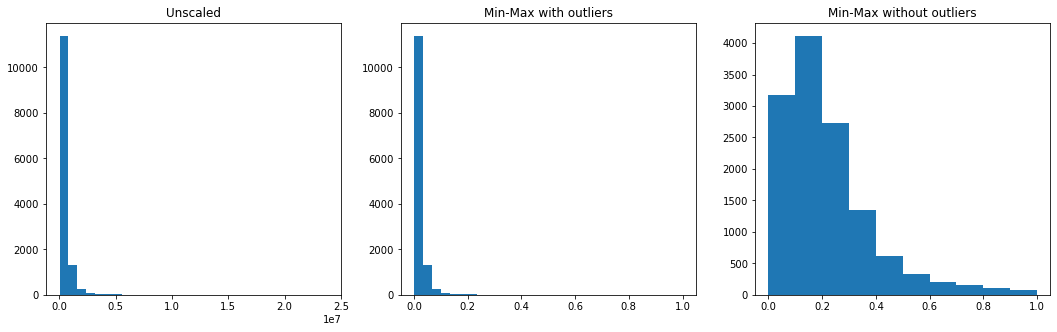

In [43]:
fig = plt.figure(figsize = (18,5))

plt.subplot(131)
plt.hist(train.tax_value, bins = 30)
plt.title('Unscaled')
# plt.xlim(-1,20)

plt.subplot(132)
plt.hist(scaled, bins = 30)
plt.title('Min-Max with outliers')
# plt.xlim(-1,20)

plt.subplot(133)
plt.hist(scaled1)
plt.title('Min-Max without outliers');

Text(0, 0.5, 'Scaled tax value')

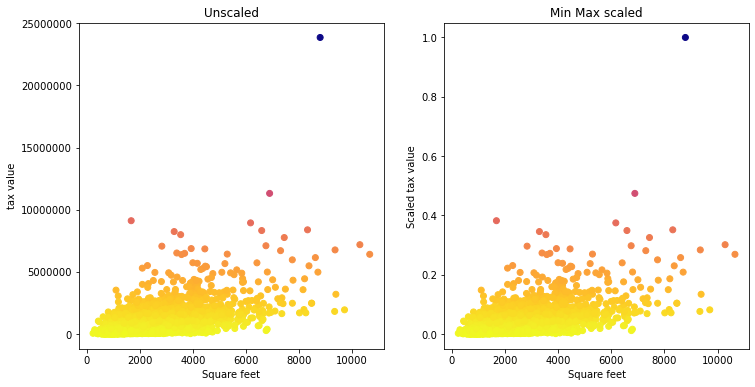

In [44]:
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(train.square_feet, train.tax_value, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Unscaled')
plt.xlabel('Square feet')
plt.ylabel('tax value')


plt.subplot(122)
plt.scatter(train.square_feet, scaled, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Min Max scaled')
plt.xlabel('Square feet')
plt.ylabel('Scaled tax value')

### Robust Scaler

In [45]:
scaler = sklearn.preprocessing.RobustScaler()
scaled = scaler.fit_transform(train[['tax_value']])

scaler1 = sklearn.preprocessing.RobustScaler()
scaled1 = scaler.fit_transform(train_no_outliers[['tax_value']])


''

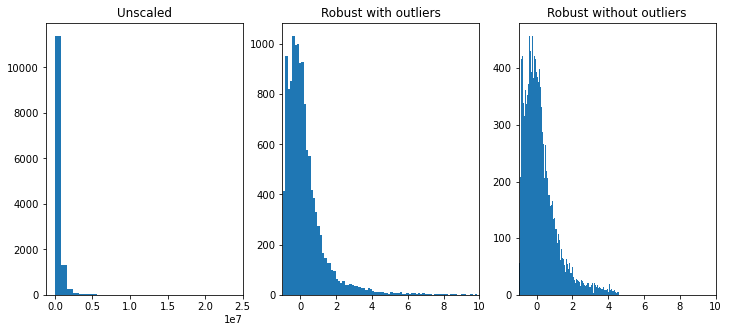

In [46]:
fig = plt.figure(figsize = (12,5))


plt.subplot(131)
plt.hist(train.tax_value, bins = 30)
plt.title('Unscaled')
# plt.xlim(-1,20)



plt.subplot(132)
plt.hist(scaled, bins = 500)
plt.title('Robust with outliers')
plt.xlim(-1,10)

plt.subplot(133)
plt.hist(scaled1, bins = 100)
plt.title('Robust without outliers')
plt.xlim(-1,10)
;

Text(0, 0.5, 'Scaled tax value')

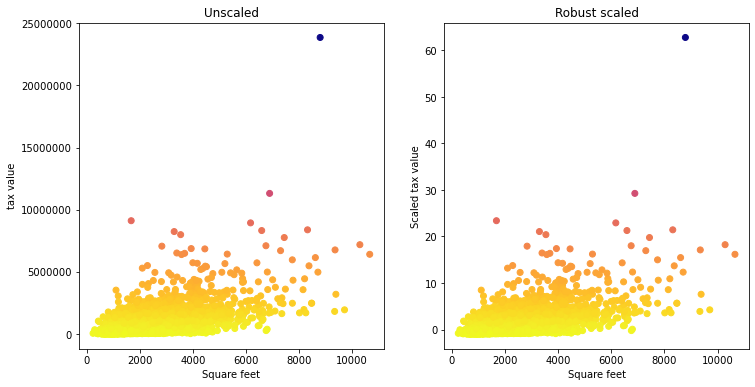

In [47]:
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(train.square_feet, train.tax_value, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Unscaled')
plt.xlabel('Square feet')
plt.ylabel('tax value')


plt.subplot(122)
plt.scatter(train.square_feet, scaled, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Robust scaled')
plt.xlabel('Square feet')
plt.ylabel('Scaled tax value')

### Quantile Transformer

In [48]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaled = scaler.fit_transform(train[['tax_value']])

scaler1 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaled1 = scaler.fit_transform(train_no_outliers[['tax_value']])



''

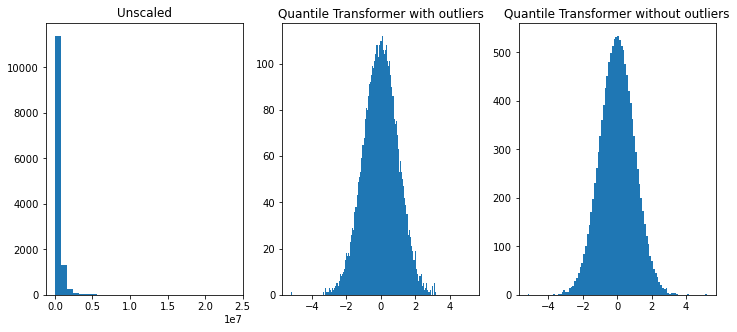

In [49]:
fig = plt.figure(figsize = (12,5))


plt.subplot(131)
plt.hist(train.tax_value, bins = 30)
plt.title('Unscaled')
# plt.xlim(-1,20)


plt.subplot(132)
plt.hist(scaled, bins = 500)
plt.title('Quantile Transformer with outliers')

plt.subplot(133)
plt.hist(scaled1, bins = 100)
plt.title('Quantile Transformer without outliers')
;

Text(0, 0.5, 'Scaled tax value')

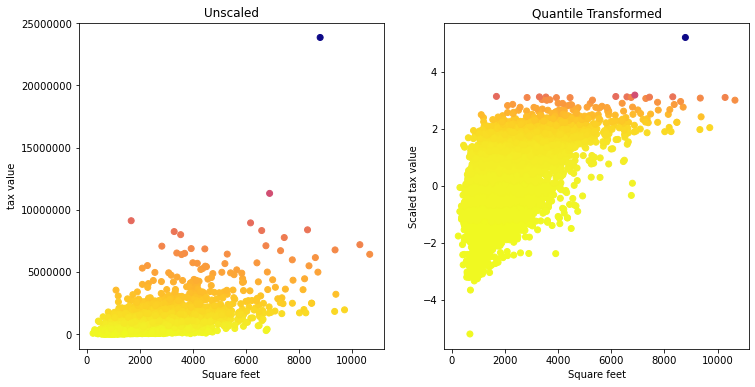

In [50]:
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(train.square_feet, train.tax_value, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Unscaled')
plt.xlabel('Square feet')
plt.ylabel('tax value')


plt.subplot(122)
plt.scatter(train.square_feet, scaled, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Quantile Transformed')
plt.xlabel('Square feet')
plt.ylabel('Scaled tax value')